<a href="https://colab.research.google.com/github/dkd99/my-code-practice/blob/main/pytorch%20basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 18078327.82it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 298023.72it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5610262.52it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12157813.62it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



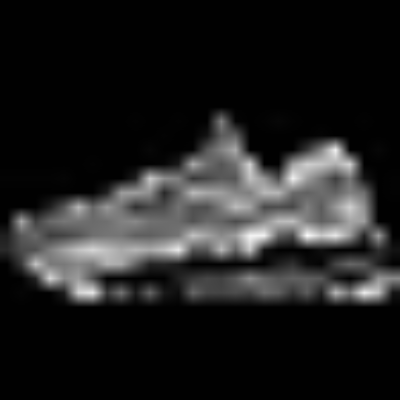

In [41]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Assuming trainloader contains your dataset
images, labels = next(iter(trainloader))

# Convert the PyTorch tensor to a NumPy array
image = images[0].numpy()

# Reshape the image from (1, 28, 28) to (28, 28)
image = np.squeeze(image)

# Scale the pixel values to the range [0, 255] and convert to uint8
image = (image * 255).astype(np.uint8)
resized_image = cv2.resize(image, (400, 400))  # Adjust the size as needed


# Display the image using OpenCV
cv2_imshow(resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [42]:
from torch import nn, optim
import torch.nn.functional as F

In [43]:
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [44]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [45]:
# TODO: Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5154852364013698
Training loss: 0.3892199352923741
Training loss: 0.35361220830602685
Training loss: 0.3310023378302802
Training loss: 0.3137057830116896


In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [48]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)


torch.Size([64, 10])


In [49]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[0],
        [6],
        [6],
        [0],
        [0],
        [6],
        [6],
        [6],
        [6],
        [6]])


In [50]:
ps

tensor([[0.1118, 0.0927, 0.0904, 0.1077, 0.0920, 0.0859, 0.1116, 0.1072, 0.0921,
         0.1086],
        [0.1075, 0.0954, 0.0940, 0.1085, 0.0919, 0.0891, 0.1102, 0.1046, 0.0933,
         0.1055],
        [0.1071, 0.0973, 0.0940, 0.1081, 0.0891, 0.0927, 0.1109, 0.1027, 0.0958,
         0.1022],
        [0.1132, 0.0940, 0.0927, 0.1062, 0.0904, 0.0860, 0.1119, 0.1061, 0.0917,
         0.1077],
        [0.1116, 0.0955, 0.0958, 0.1046, 0.0910, 0.0913, 0.1094, 0.1036, 0.0932,
         0.1040],
        [0.1100, 0.0902, 0.0922, 0.1081, 0.0918, 0.0869, 0.1143, 0.1036, 0.0945,
         0.1083],
        [0.1067, 0.0940, 0.0958, 0.1104, 0.0914, 0.0869, 0.1140, 0.1041, 0.0911,
         0.1055],
        [0.1065, 0.0955, 0.0968, 0.1084, 0.0900, 0.0934, 0.1125, 0.1012, 0.0938,
         0.1019],
        [0.1110, 0.0907, 0.0932, 0.1076, 0.0914, 0.0865, 0.1128, 0.1053, 0.0943,
         0.1074],
        [0.1092, 0.0939, 0.0933, 0.1095, 0.0900, 0.0871, 0.1146, 0.1047, 0.0913,
         0.1065],
        [0

In [51]:
equals = top_class == labels.view(*top_class.shape)


In [53]:
equals

tensor([[ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False

In [52]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 10.9375%


In [54]:
model = Classifier()
criterion = nn.NLLLoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30

train_losses, test_losses = [], []
for e in range(epochs):
    tot_train_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        tot_train_loss += loss.item()

        loss.backward()
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                loss = criterion(log_ps, labels)
                tot_test_loss += loss.item()

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()

        # Get mean loss to enable comparison between train and test sets
        train_loss = tot_train_loss / len(trainloader.dataset)
        test_loss = tot_test_loss / len(testloader.dataset)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(testloader.dataset)))

Epoch: 1/30..  Training Loss: 0.519..  Test Loss: 0.437..  Test Accuracy: 0.844
Epoch: 2/30..  Training Loss: 0.391..  Test Loss: 0.395..  Test Accuracy: 0.862
Epoch: 3/30..  Training Loss: 0.355..  Test Loss: 0.387..  Test Accuracy: 0.867
Epoch: 4/30..  Training Loss: 0.331..  Test Loss: 0.367..  Test Accuracy: 0.868
Epoch: 5/30..  Training Loss: 0.318..  Test Loss: 0.393..  Test Accuracy: 0.866
Epoch: 6/30..  Training Loss: 0.301..  Test Loss: 0.371..  Test Accuracy: 0.874
Epoch: 7/30..  Training Loss: 0.292..  Test Loss: 0.379..  Test Accuracy: 0.869
Epoch: 8/30..  Training Loss: 0.283..  Test Loss: 0.388..  Test Accuracy: 0.863
Epoch: 9/30..  Training Loss: 0.277..  Test Loss: 0.385..  Test Accuracy: 0.869
Epoch: 10/30..  Training Loss: 0.267..  Test Loss: 0.380..  Test Accuracy: 0.873
Epoch: 11/30..  Training Loss: 0.260..  Test Loss: 0.353..  Test Accuracy: 0.878
Epoch: 12/30..  Training Loss: 0.253..  Test Loss: 0.362..  Test Accuracy: 0.874
Epoch: 13/30..  Training Loss: 0.248.

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

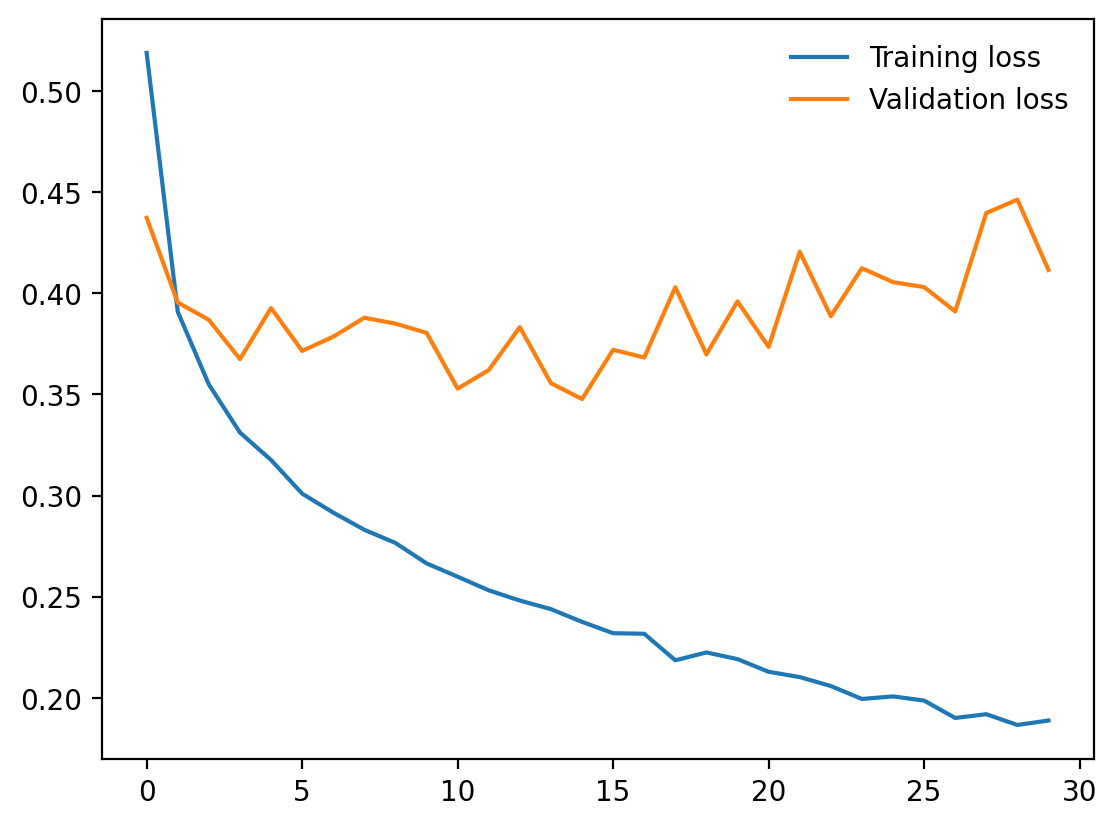

In [56]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [57]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [58]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.616..  Test Loss: 0.476..  Test Accuracy: 0.832
Epoch: 2/30..  Training Loss: 0.483..  Test Loss: 0.473..  Test Accuracy: 0.832
Epoch: 3/30..  Training Loss: 0.454..  Test Loss: 0.424..  Test Accuracy: 0.849
Epoch: 4/30..  Training Loss: 0.438..  Test Loss: 0.411..  Test Accuracy: 0.854
Epoch: 5/30..  Training Loss: 0.427..  Test Loss: 0.398..  Test Accuracy: 0.857
Epoch: 6/30..  Training Loss: 0.410..  Test Loss: 0.409..  Test Accuracy: 0.850
Epoch: 7/30..  Training Loss: 0.407..  Test Loss: 0.390..  Test Accuracy: 0.859
Epoch: 8/30..  Training Loss: 0.398..  Test Loss: 0.392..  Test Accuracy: 0.864
Epoch: 9/30..  Training Loss: 0.399..  Test Loss: 0.398..  Test Accuracy: 0.861
Epoch: 10/30..  Training Loss: 0.384..  Test Loss: 0.417..  Test Accuracy: 0.855
Epoch: 11/30..  Training Loss: 0.386..  Test Loss: 0.367..  Test Accuracy: 0.871
Epoch: 12/30..  Training Loss: 0.376..  Test Loss: 0.388..  Test Accuracy: 0.865
Epoch: 13/30..  Training Loss: 0.383.

In [59]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

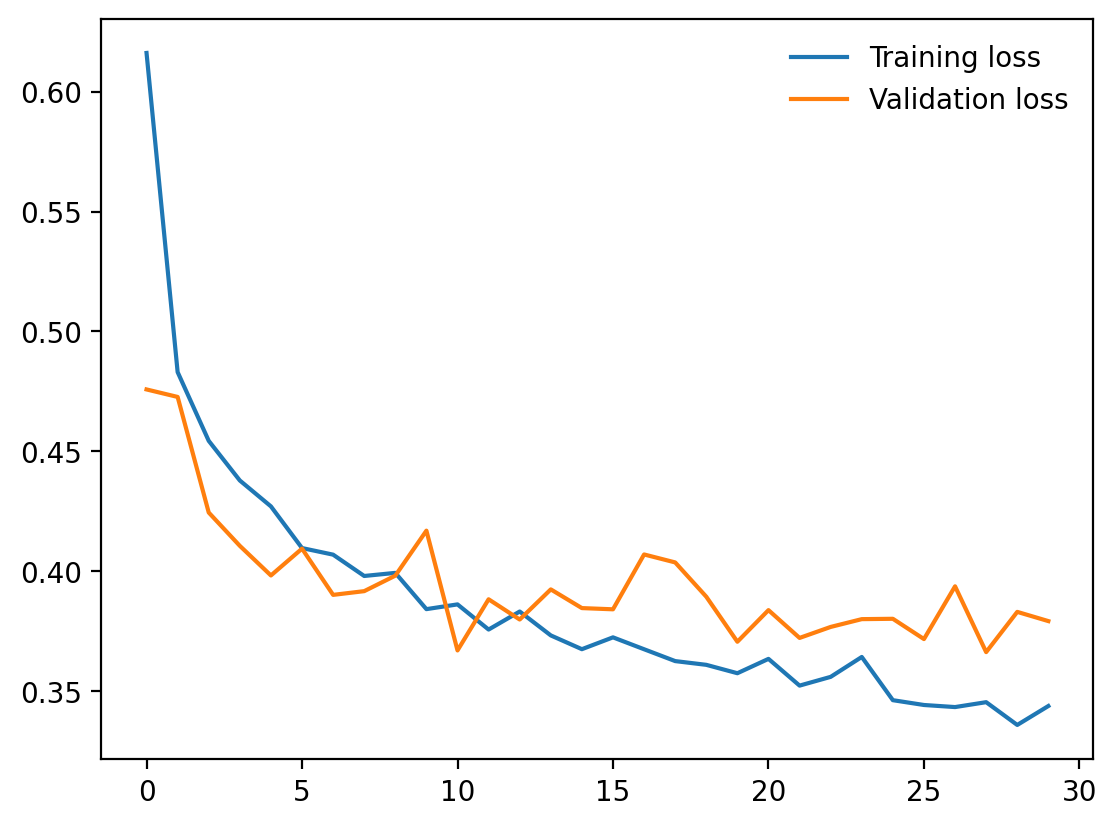

In [60]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [61]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [62]:
torch.save(model.state_dict(), 'checkpoint.pth')


In [63]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [64]:
model.load_state_dict(state_dict)


<All keys matched successfully>

In [66]:

# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)

ModuleNotFoundError: No module named 'fc_model'

In [4]:
import matplotlib.pyplot as plt


In [1]:
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [2]:
# Defining four different filters,
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


In [6]:
filters.shape

(4, 4, 4)

In [11]:
filters

array([[[-1, -1,  1,  1],
        [-1, -1,  1,  1],
        [-1, -1,  1,  1],
        [-1, -1,  1,  1]],

       [[ 1,  1, -1, -1],
        [ 1,  1, -1, -1],
        [ 1,  1, -1, -1],
        [ 1,  1, -1, -1]],

       [[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [ 1,  1,  1,  1],
        [ 1,  1,  1,  1]],

       [[ 1,  1,  1,  1],
        [ 1,  1,  1,  1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1]]])

In [8]:
import torch

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)


In [12]:
weight.shape

torch.Size([4, 1, 4, 4])

In [13]:
weight

tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])

In [10]:
weight[2:]

tensor([[[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])

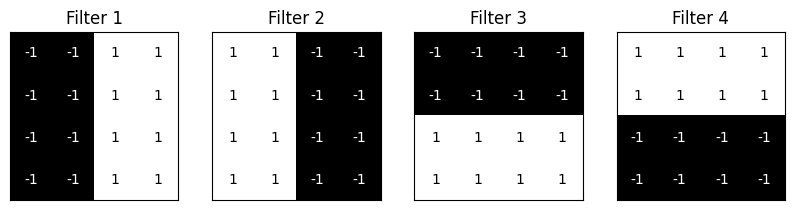

In [5]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

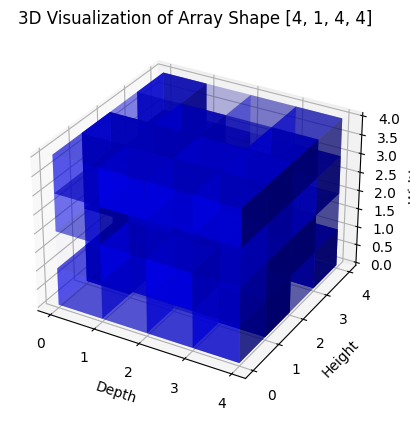

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a random array to represent the shape
array = np.random.rand(4, 1, 4, 4)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the dimensions of the array
depth, height, width = array.shape[0], array.shape[2], array.shape[3]

# Iterate through each element in the array
for d in range(depth):
    for h in range(height):
        for w in range(width):
            # Plot a block at the corresponding position
            ax.bar3d(d, h, w, 1, 1, 1, color='b', alpha=array[d, 0, h, w])

# Set labels and title
ax.set_xlabel('Depth')
ax.set_ylabel('Height')
ax.set_zlabel('Width')
ax.set_title('3D Visualization of Array Shape [4, 1, 4, 4]')

# Show the plot
plt.show()


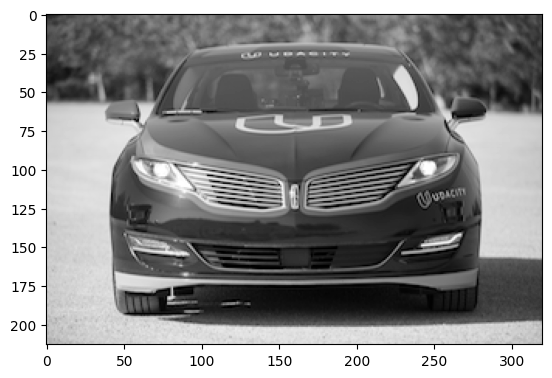

In [18]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'udacity_sdc.png'

# load color image
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):

    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)

        # returns both layers
        return conv_x, activated_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [16]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

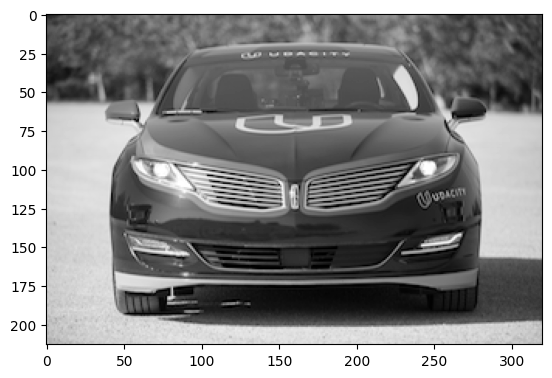

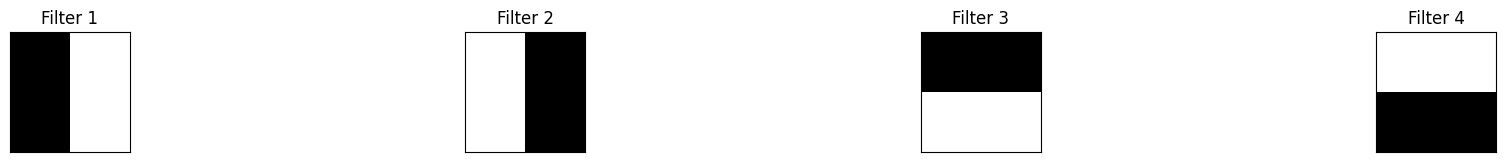

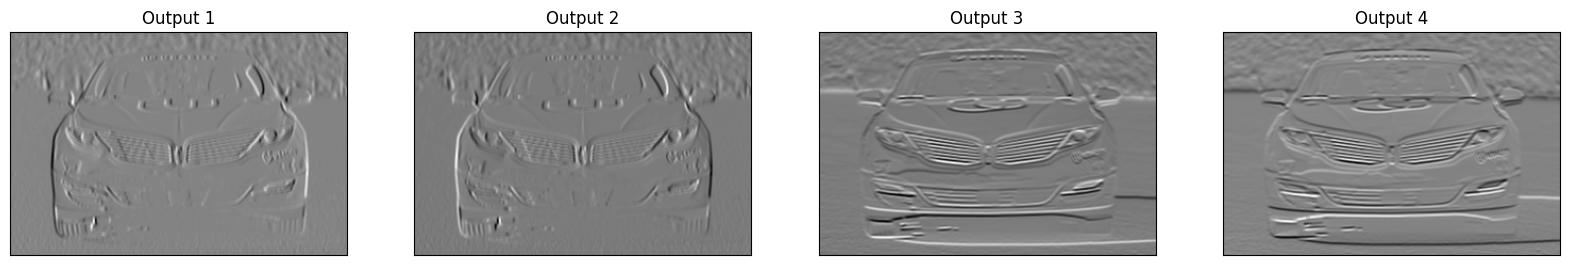

In [19]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))


# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)